## Fig S8: Optimal mutation rate as a function of the size of the binding sites and information content of energy matrices.

Required packages:

In [1]:
# processing
import numpy as np
import scipy.optimize

# visualization
import matplotlib.pyplot as plt
from tregs.mpl_pboc import plotting_style

plt.rcParams.update({'font.size': 12})
plotting_style()

fdir = '../data/'
out_fdir = '../plots/figS8/'

To calculate the optimal mutation rate for a promoter with the simple repression regulatory architecture, we define the following functions with the expression for $\kappa$, the ratio between the Boltzmann weight of the repressor binding state and that of the RNAP binding site

In [2]:
def simple_repression(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return R/P * np.exp(-(epsilon_R + m * l_R * delta_epsilon_R)) / np.exp(-(epsilon_P + m * l_P * delta_epsilon_P))

def simple_repression_zero(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return simple_repression(m, epsilon_R, epsilon_P, delta_epsilon_R, delta_epsilon_P, R, P, l_R, l_P) - 1

We initialize the following figure for plotting the heatmap of optimal mutation rates under different parameter pairs

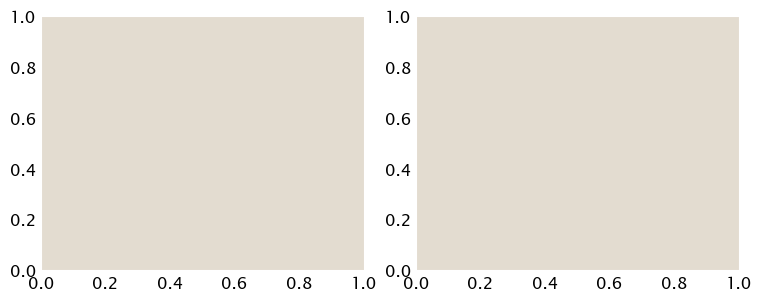

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(7.5, 2.9), layout='compressed')

Plotting the heatmap of optimal mutation rates under different lengths of RNAP and repressor binding sites

In [4]:
l_R = np.arange(7, 31, 1)
l_P = np.arange(7, 31, 1)
z =  -1 * np.ones([len(l_R), len(l_P)])
for i, lr in enumerate(l_R):
  for j, lp in enumerate(l_P):
    if simple_repression(0, -15, -5, 2.24, 0.36, 10, 5000, lr, lp) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, -5, 2.24, 0.36, 10, 5000, lr, lp), full_output=1, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[0].contourf(l_P, l_R, z, origin="lower",
                      extent=(1, l_P.max(), 1, l_R.max()),
                      levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75])
ax[0].set_ylabel("Length of repressor binding site")
ax[0].set_xlabel("Length of RNAP binding site")

ax[0].set_ylim(l_R.min(), l_R.max())
ax[0].set_xlim(l_P.min(), l_P.max())
ax[0].scatter([20], [21], marker='x',color='white')
ax[0].grid(False)

Plotting the heatmap of optimal mutation rates under different information content of energy matrices

In [5]:
d_eps_R_range = np.linspace(1, 4, 100)
d_eps_P_range = np.linspace(0.1, 0.8, 100)
z =  -1 * np.ones([len(d_eps_R_range), len(d_eps_P_range)])
for i, d_eps_R in enumerate(d_eps_R_range):
  for j, d_eps_P in enumerate(d_eps_P_range):
    if simple_repression(0, -15, -5, d_eps_R, d_eps_P, 10, 5000, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, -5, d_eps_R, d_eps_P, 10, 5000, 20, 20), disp=False, full_output=1)
      if r.converged:
        z[i, j] = x

cset = ax[1].contourf(d_eps_P_range, d_eps_R_range, z, origin="lower",
                      extent=(d_eps_P_range.min(), d_eps_P_range.max(), d_eps_R_range.min(), d_eps_R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75])

ax[1].set_ylabel(r"$\Delta\Delta\varepsilon_\mathrm{rd}\:(k_BT)$")
ax[1].set_xlabel(r"$\Delta\Delta\varepsilon_\mathrm{pd}\:(k_BT)$")
ax[1].scatter([0.36], [2.24], marker='x',color='white')
ax[1].grid(False)

Adding a color bar to the heatmaps and visualize the figure

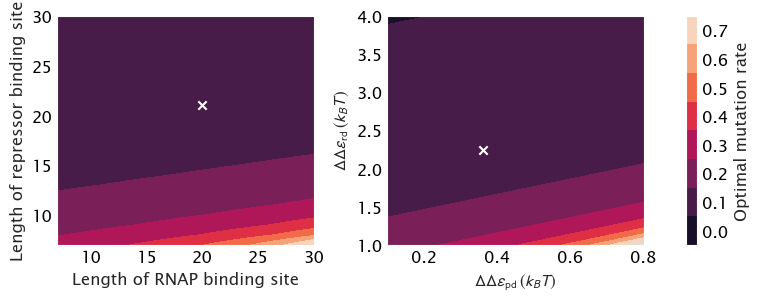

In [6]:
cbar = fig.colorbar(cset, ax=ax, label='Optimal mutation rate', )
cbar.ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
cbar.ax.set_position([0.77, 0.01, 0.02, 1])  # [left, bottom, width, height]

fig.savefig(out_fdir + "size_information_content.pdf", bbox_inches='tight')

fig